<a href="https://colab.research.google.com/github/colgate116/T_rex_game/blob/master/Shavrin_Nikolay_(%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%9D%D0%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma.core import argmax

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.datasets.fashion_mnist import load_data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(128, 5, activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64,3, activation = 'relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 512)              

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0.05,
                           patience=5,
                           verbose=1,
                           mode='min'
                          )

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, callbacks = early_stop)

Epoch 1/20
938/938 [==============================] - 10s 8ms/step - loss: 0.7135 - acc: 0.7839 - val_loss: 0.4914 - val_acc: 0.8204
Epoch 2/20
938/938 [==============================] - 7s 8ms/step - loss: 0.4001 - acc: 0.8576 - val_loss: 0.4008 - val_acc: 0.8601
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.3597 - acc: 0.8695 - val_loss: 0.3660 - val_acc: 0.8686
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.3374 - acc: 0.8784 - val_loss: 0.3660 - val_acc: 0.8650
Epoch 5/20
938/938 [==============================] - 7s 8ms/step - loss: 0.3171 - acc: 0.8850 - val_loss: 0.3586 - val_acc: 0.8768
Epoch 6/20
938/938 [==============================] - 7s 8ms/step - loss: 0.2986 - acc: 0.8916 - val_loss: 0.3587 - val_acc: 0.8781
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 0.2893 - acc: 0.8954 - val_loss: 0.3303 - val_acc: 0.8827
Epoch 8/20
938/938 [==============================] - 8s 8ms/step - loss: 0

answer 4
1/1 [==============================] - 0s 56ms/step
pred 4


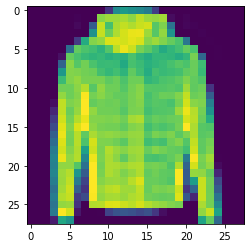

In [ ]:
a=364
plt.imshow(x_test[a])
print('answer',argmax(y_test[a]))
print('pred',argmax(model.predict(x_test[a].reshape(-1,28,28,1))))